In [61]:
import calendar
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, seasonal_plot, month_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("ggplot")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "figure.figsize": (7,5), "lines.linewidth": 2})
#from scripts.plotting import *


<AxesSubplot: xlabel='Time', ylabel='Sunspots'>

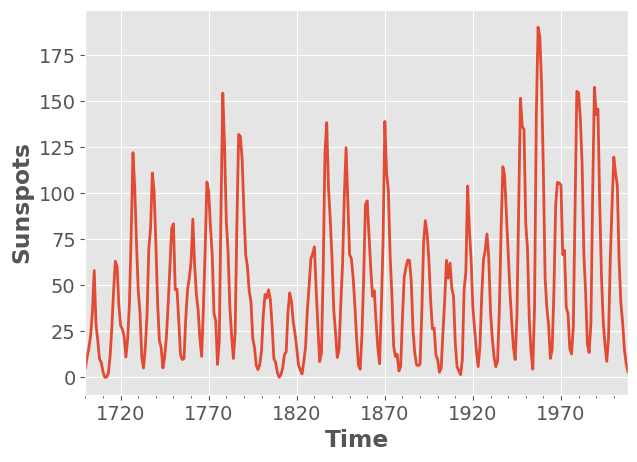

In [62]:
sun = pd.read_csv("data/sunspots.csv", index_col = 0, parse_dates = True)
sun.plot.line(xlabel="Time", ylabel="Sunspots", legend=False)

In [63]:
sun["sunspots lagged(1)"] = sun["sunspots"].shift(1)
sun

,sunspots,sunspots lagged(1)
year,,
1700-12-31,5.0,NaN
1701-12-31,11.0,5.0
1702-12-31,16.0,11.0
1703-12-31,23.0,16.0
1704-12-31,36.0,23.0
...,...,...
2004-12-31,40.4,63.7
2005-12-31,29.8,40.4
2006-12-31,15.2,29.8


In [64]:
sun["sunspots"].corr(sun["sunspots lagged(1)"])

0.8236288837177275

In [68]:
#plot_autocorrelation(sun, dlag =1, max_lag=48)
#!pip install statsmodels

<AxesSubplot: xlabel='Time', ylabel='Sunspots'>

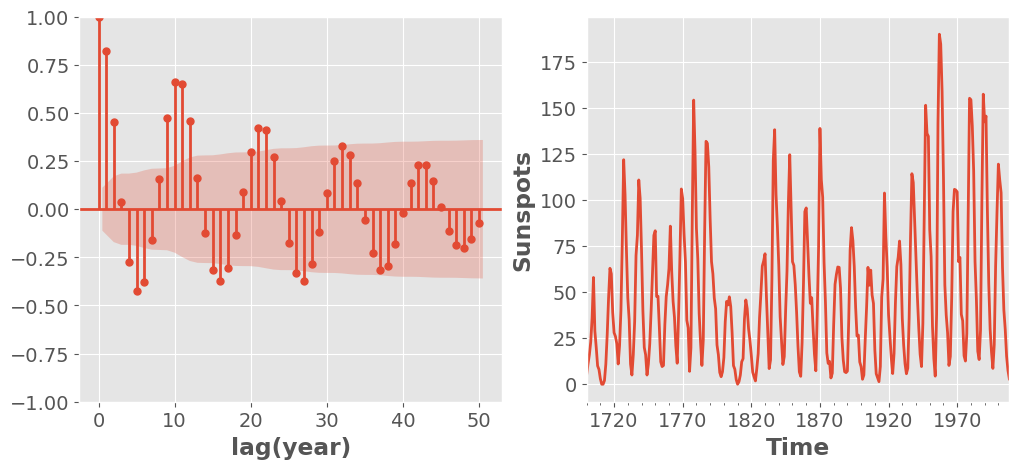

In [66]:
#correlogram
from statsmodels.graphics.tsaplots import plot_acf, seasonal_plot, month_plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plot_acf(sun["sunspots"], lags=50, title=None, ax = ax1)
ax1.set_xlabel("lag(year)")
ax1.set_xlabel("lag(year)")

sun.sunspots.plot.line(xlabel="Time", ylabel="Sunspots", legend=False, ax = ax2)

In [67]:
import matplotlib.pyplot as plt
plot_autocorrelation(sun, label="sunspots", dlag=1, max_lag=48)

NameError: name 'plot_autocorrelation' is not defined

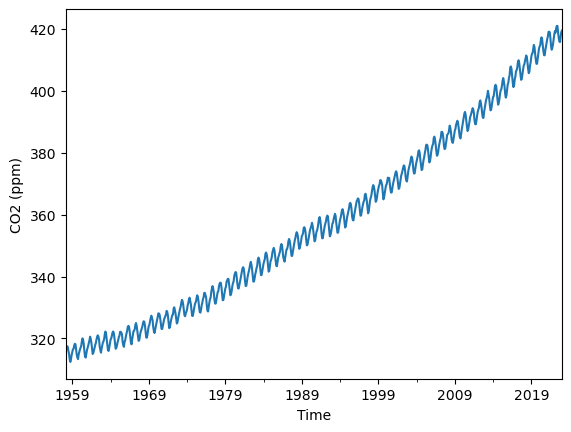

In [49]:
#
co2 = pd.read_csv("data/co2.csv", index_col=0, parse_dates=True)
co2.plot.line(xlabel="Time", ylabel="CO2 (ppm)", legend=False);

<AxesSubplot: xlabel='Time', ylabel='CO2 (ppm)'>

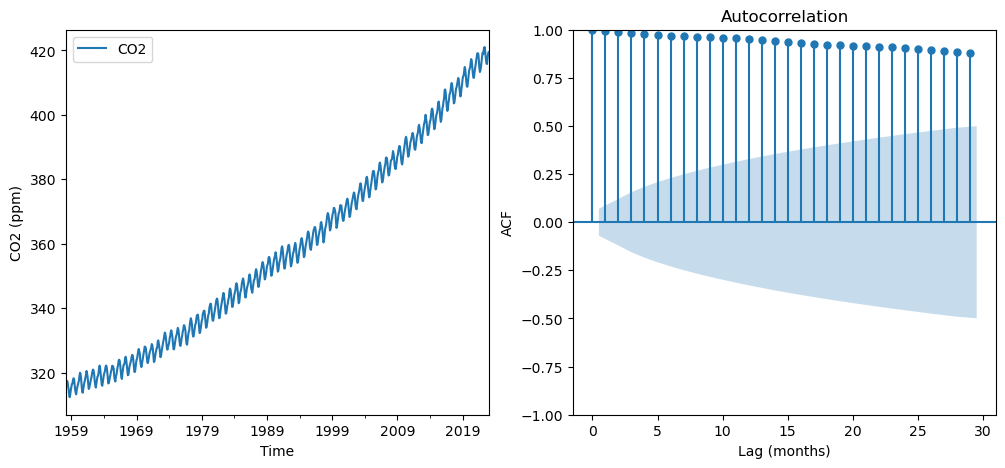

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plot_acf(co2, ax = ax2)
ax2.set_xlabel("Lag (months)")
ax2.set_ylabel('ACF')


co2.plot.line(ax= ax1, xlabel="Time", ylabel="CO2 (ppm)")

<AxesSubplot: xlabel='Time', ylabel='CO2 (ppm)'>

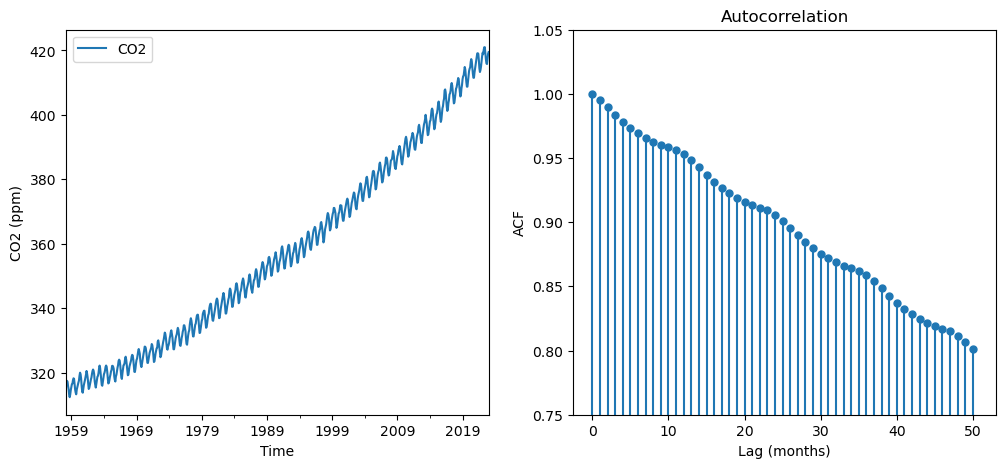

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plot_acf(co2, ax = ax2, lags = 50, auto_ylims=True)
ax2.set_xlabel("Lag (months)")
ax2.set_ylabel('ACF')
plt.ylim(.75, 1.05)

co2.plot.line(ax= ax1, xlabel="Time", ylabel="CO2 (ppm)")

<AxesSubplot: xlabel='Time', ylabel='CO2 (ppm)'>

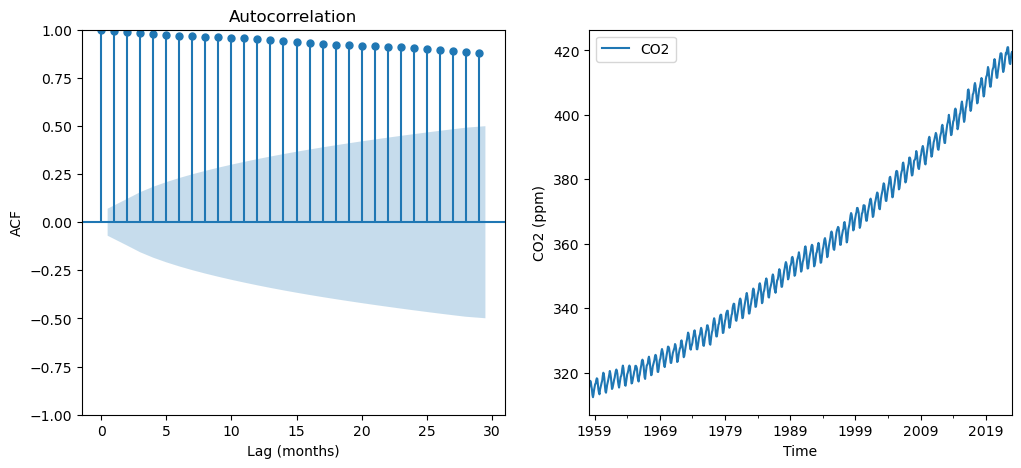

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
co2["CO2"] = co2.CO2.values[::-1]
plot_acf(co2, ax = ax1)
ax1.set_xlabel("Lag (months)")
ax1.set_ylabel('ACF')
co2.plot.line(ax= ax2, xlabel="Time", ylabel="CO2 (ppm)")

Text(0.5, 1.0, 'White noise')

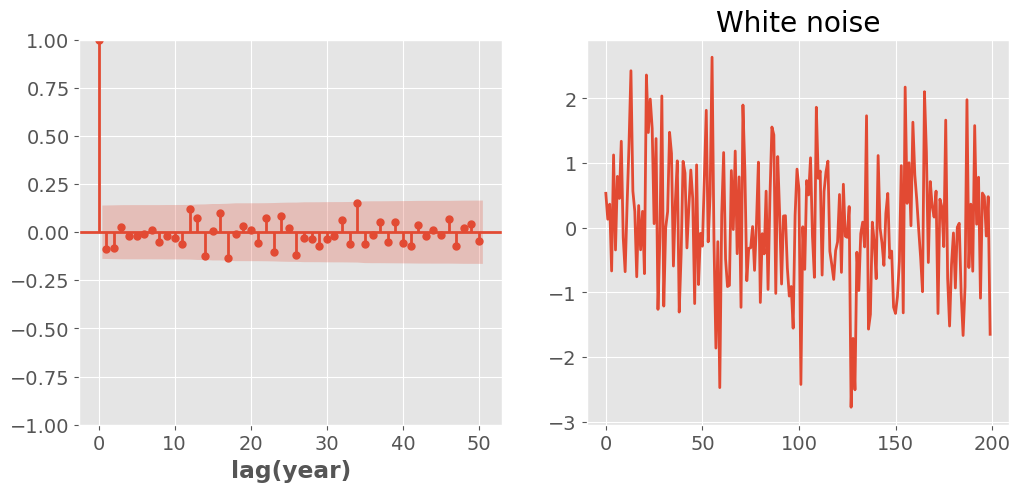

In [71]:
#correlogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plot_acf(np.random.normal(size=200), lags=50, title=None, ax = ax1)
ax1.set_xlabel("lag(year)")
ax1.set_xlabel("lag(year)")
ax2.plot(np.random.normal(size=200))
ax2.set_title("White noise")

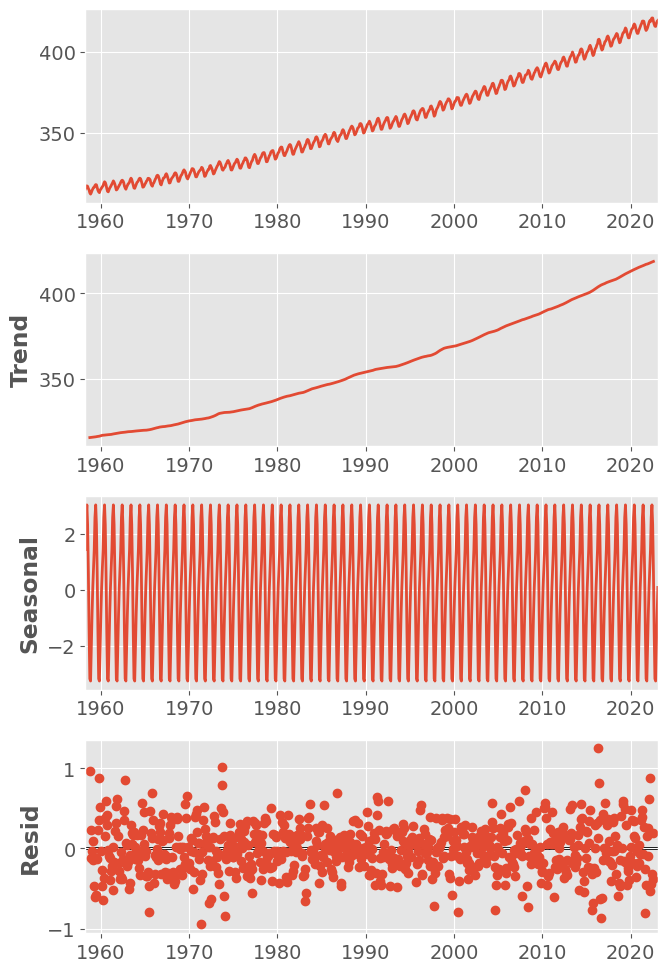

In [72]:
model = seasonal_decompose(co2[["CO2"]], model="additive", period=12)
with mpl.rc_context():  # this context manager help adjust the size of the plot
    mpl.rc("figure", figsize=(7, 10))
    model.plot()
    plt.tight_layout()

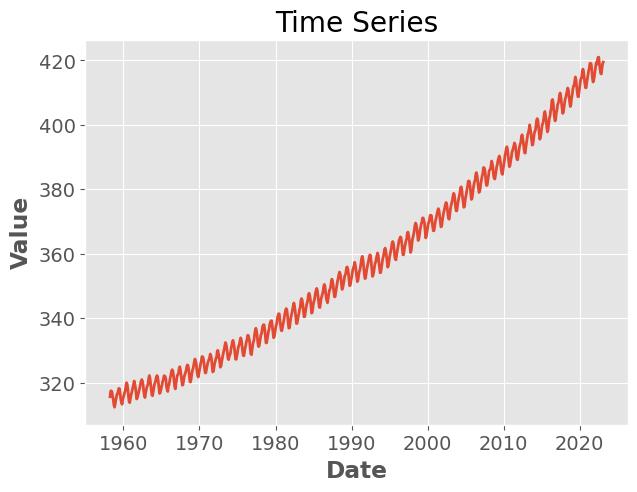

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the time series data
data = co2#pd.read_csv('time_series_data.csv', index_col=0, parse_dates=True)

# Method 1: Moving averages
window_size = 12  # Number of observations to include in the moving average window
data['MA'] = co2['CO2'].rolling(window=window_size).mean()

# Method 2: Regression analysis
x = np.arange(len(data))
y = data['CO2']
coeffs = np.polyfit(x, y, deg=1)
trend = np.polyval(coeffs, x)
data['Trend'] = trend

# Method 3: Seasonal decomposition
decomposition = seasonal_decompose(data['CO2'], model='additive')
data['Trend'] = decomposition.trend

# Method 4: Visual inspection
plt.plot(data.index, data['CO2'])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
